In [2]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-10-06 10:41:39.411073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Set the path to the FireNet dataset
firenet_path = 'drawDataset'

# Set the input size for the images
input_size = (512, 512)

# Define the data generators for the training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    firenet_path,
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='training')
val_generator = train_datagen.flow_from_directory(
    firenet_path,
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 227 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [21]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_size[0], input_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
8/8 [==============================] - 110s 14s/step - loss: 5.5693 - accuracy: 0.4361 - val_loss: 0.6951 - val_accuracy: 0.4643
Epoch 2/10
8/8 [==============================] - 44s 6s/step - loss: 0.7032 - accuracy: 0.5198 - val_loss: 0.6998 - val_accuracy: 0.4643
Epoch 3/10
8/8 [==============================] - 40s 5s/step - loss: 0.6954 - accuracy: 0.5595 - val_loss: 0.6909 - val_accuracy: 0.5357
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 0.6920 - accuracy: 0.5374 - val_loss: 0.6921 - val_accuracy: 0.5357
Epoch 5/10
8/8 [==============================] - 38s 5s/step - loss: 0.6792 - accuracy: 0.5683 - val_loss: 0.6893 - val_accuracy: 0.5357
Epoch 6/10
8/8 [==============================] - 38s 5s/step - loss: 0.6731 - accuracy: 0.5551 - val_loss: 0.8914 - val_accuracy: 0.5357
Epoch 7/10
8/8 [==============================] - 38s 5s/step - loss: 0.7005 - accuracy: 0.5771 - val_loss: 0.6879 - val_accuracy: 0.5536
Epoch 8/10
8/8 [================

In [23]:
# evaluate the model
score = model.evaluate(val_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# we save the model
model.save('model.h5')

Test loss: 0.7020498514175415
Test accuracy: 0.5357142686843872


In [24]:
import numpy as np
from PIL import Image

In [25]:
# load the trained model£
model = keras.models.load_model("model.h5")

In [45]:
image = Image.open("drawing.png")
original_image = image  # save the original image to display it later
# lreprocess the user's image
image_array = np.array(image) / 255.0  # normalization
image_array = np.expand_dims(image_array, axis=0) 
image_array = image_array[:, :, :, :3]

In [46]:
# make a prediction
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print(predicted_class)

1/1 [==============================] - 0s 80ms/step
0


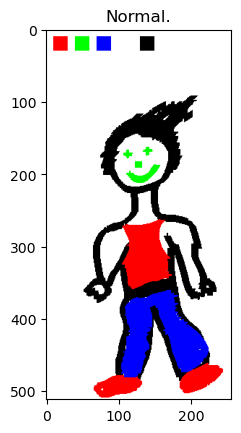

In [47]:
# display the prediction
class_names = ["Normal.", "Not Normal !"]
from matplotlib import pyplot as plt
plt.title(class_names[predicted_class])
plt.imshow(original_image)